#CS16B021 PRIYANSH SANGULE
#LAB2 AM,FM,PM : Modulation and Demodulation

In [1]:
%pylab
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from numpy.random import randn

from scipy import signal
from scipy.signal import butter, lfilter
from scipy import integrate

%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## Frequency Modulation (FM) and Demodulation




Here, when the bit is one, signal frequency changes



In [0]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = fs//baud
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

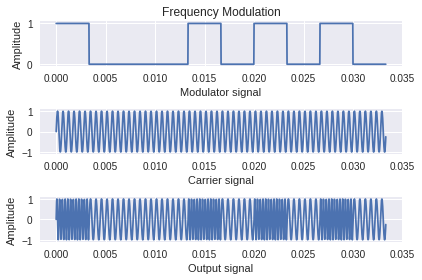

In [3]:
# Random Seed = 1
np.random.seed(seed=1)

#Making Random array of bits of size 10
bits = randn(Nbits,1) > 0

#Tilize the array to 1 x Ns dimension
M = np.tile(bits,(1,Ns))+1

#Time
t = r_[0.0:N]/fs

#Final plot value of FM.
# High frequency when bit is 1
# Low frequency when bit is 0
signal = sin(2*pi*f0*M.ravel()*t)

#Plotting the graph
plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(t,M.ravel()-1)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(t, sin(2*pi*f0*t))
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(t, signal)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
#Resizing
plt.tight_layout()
plt.show()




### Demodulating FM signal

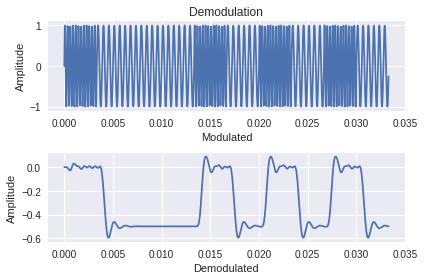

In [4]:
#Given Low Pass Filter 
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b,a = butter(order, normal_cutoff, btype='low', analog  = False)
    return b,a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b,a=butter_lowpass(cutoff,fs,order=order)
    y = lfilter(b,a,data)
    return y

#Multiplying original signal with another sine wave to increase frequency
#Cutoff set at f0/2
demodulated = butter_lowpass_filter(signal*sin(2*pi*f0*t), f0/2, fs,6)

#Plotting the graph
plt.subplot(2, 1, 1)
plt.title('Demodulation')
plt.plot(t,signal)
plt.ylabel('Amplitude')
plt.xlabel('Modulated')
plt.subplot(2, 1, 2)

#Plotting negative of demodulated wave to obtain close to original analog signal
plt.plot(t, -demodulated)
plt.ylabel('Amplitude')
plt.xlabel('Demodulated')
#Resizing
plt.tight_layout()
plt.show()

## Amplitude Modulation (AM) and Demodulation



Here, when the bit is one, the amplitude increases

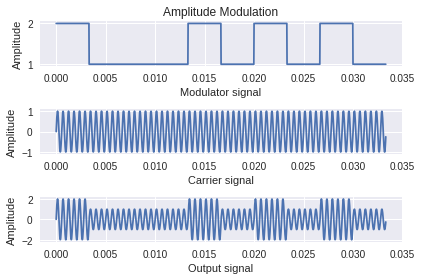

In [5]:
# Random Seed = 1
np.random.seed(seed=1)

#Making Random array of bits of size 10
bits = randn(Nbits,1) > 0

#Tilize the array to 1 x Ns dimension
M = np.tile(bits,(1,Ns))+1

#Time
t = r_[0.0:N]/fs

#Final plot value of AM.
# High amplitude when bit is 1
# Low amplitude when bit is 0
signal = M.ravel()*sin(2*pi*f0*t)

#Plotting the graph
plt.subplot(3, 1, 1)
plt.title('Amplitude Modulation')
plt.plot(t,M.ravel())
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(t, sin(2*pi*f0*t))
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(t, signal)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')

#Resizing
plt.tight_layout()
plt.show()




### Demodulating AM signal

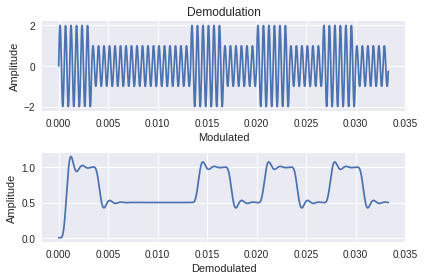

In [6]:
#Given Low Pass Filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b,a = butter(order, normal_cutoff, btype='low', analog  = False)
    return b,a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b,a=butter_lowpass(cutoff,fs,order=order)
    y = lfilter(b,a,data)
    return y

#Multiplying original signal with another sine wave to increase frequency
#Cutoff set at f0/2
demodulated = butter_lowpass_filter(signal*sin(2*pi*f0*t), f0/2, fs,6)

#Plotting the graph
plt.subplot(2, 1, 1)
plt.title('Demodulation')
plt.plot(t,signal)
plt.ylabel('Amplitude')
plt.xlabel('Modulated')
plt.subplot(2, 1, 2)
plt.plot(t,demodulated)
plt.ylabel('Amplitude')
plt.xlabel('Demodulated')
#Resizing
plt.tight_layout()
plt.show()

## Phase Modulation (PM)




Here, when the bit is one, the amplitude increases

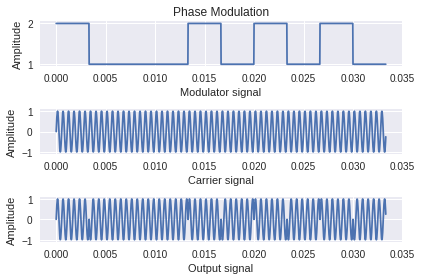

In [7]:
# Random Seed = 1
np.random.seed(seed=1)

#Making Random array of bits of size 10
bits = randn(Nbits,1) > 0

#Tilize the array to 1 x Ns dimension
M = np.tile(bits,(1,Ns))+1

#Time
t = r_[0.0:N]/fs

#Final plot value of PM.
# Inverted phase when bit is 1
# Invert phase again when bit is 0
signal = sin(2*pi*f0*t + pi*M.ravel())

#Plotting the graph
plt.subplot(3, 1, 1)
plt.title('Phase Modulation')
plt.plot(t,M.ravel())
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(t, sin(2*pi*f0*t))
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(t, signal)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')

#Resizing
plt.tight_layout()
plt.show()


